# Analyzing the Fifa 20 players by the given attributes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
files= os.listdir(r'.')

for i in files:
    if i.endswith('.csv'):
        print(i)

players_15.csv
players_17.csv
players_18.csv
players_19.csv
players_20.csv
teams_and_leagues.csv


In [3]:
df_fifa_15= pd.read_csv('players_15.csv')
df_fifa_20= pd.read_csv('players_20.csv')
df_teams_leagues= pd.read_csv('teams_and_leagues.csv')

In [4]:
#df_fifa_15['preferred_foot'].unique()

In [5]:
 df_fifa_20.head(3)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3


In [6]:
df_fifa_20.columns[:30]

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential',
       'value_eur', 'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'body_type', 'real_face', 'release_clause_eur', 'player_tags',
       'team_position', 'team_jersey_number', 'loaned_from', 'joined',
       'contract_valid_until', 'nation_position'],
      dtype='object')

In [7]:
df_fifa_20.nation_position.unique()

array([nan, 'LS', 'LW', 'GK', 'LF', 'RCM', 'SUB', 'LCB', 'RW', 'RM', 'ST',
       'LDM', 'RCB', 'CDM', 'CAM', 'CF', 'RDM', 'RF', 'LB', 'LCM', 'LM',
       'RB', 'CB', 'CM', 'RS', 'RWB', 'LWB'], dtype=object)

In [8]:
import seaborn as sns; 

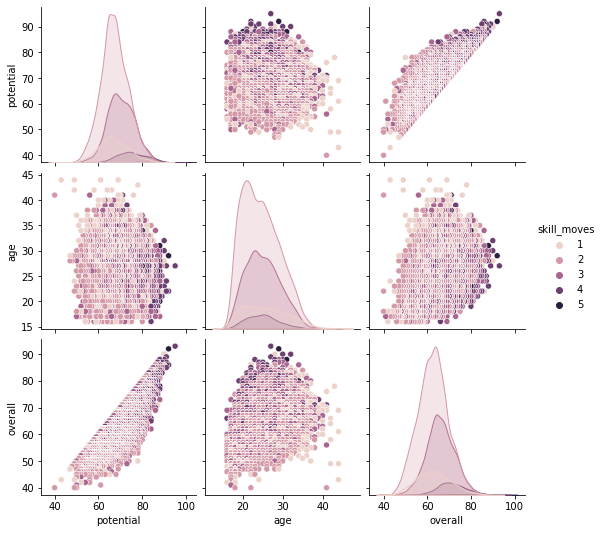

In [9]:
sns.pairplot(df_fifa_15[['potential','age', 'club','overall','preferred_foot','skill_moves']], hue='skill_moves')
plt.show()

# AGE statistics

In [10]:
min(df_fifa_15['age']), max(df_fifa_15['age'])

(16, 44)

# ODLEST players of FIFA 15 stat

In [11]:
old_player= max(df_fifa_15['age'])

In [12]:
df_fifa_15[['short_name','nationality','age','potential']][df_fifa_15['age'].values == old_player]

,short_name,nationality,age,potential
3676,Kim Byung Ji,Korea Republic,44,69
10504,A. Pierobon,Italy,44,61
15282,P. Mathers,Scotland,44,49
15455,B. Richardson,England,44,43


# FC bareclona PLAYERS

In [13]:
barcelona_15= df_fifa_15[['short_name','nationality','age','overall','potential','player_positions']][df_fifa_15['club'].values == 'FC Barcelona'].sort_values(by=['potential','age'], ascending= False)

In [14]:
barcelona_20= df_fifa_20[['short_name','nationality','age','overall','potential','player_positions']][df_fifa_20['club'].values == 'FC Barcelona'].sort_values(by=['age'], ascending= False)

# BARCA players info potential

In [15]:
barcelona_15.head(15)

,short_name,nationality,age,overall,potential,player_positions
0,L. Messi,Argentina,27,93,95,CF
5,L. Suárez,Uruguay,27,89,91,"ST, CF"
19,Neymar,Brazil,22,86,91,LW
44,Piqué,Spain,27,84,89,CB
32,Sergio Busquets,Spain,25,85,89,"CDM, CM"
101,M. ter Stegen,Germany,22,82,88,GK
27,Xavi,Spain,34,86,86,CM
71,Pedro,Spain,26,83,86,"LW, RW"
158,Jordi Alba,Spain,25,81,85,LB
75,I. Rakitić,Croatia,26,83,84,"CAM, CM"


In [16]:
barcelona_15.head(10)

,short_name,nationality,age,overall,potential,player_positions
0,L. Messi,Argentina,27,93,95,CF
5,L. Suárez,Uruguay,27,89,91,"ST, CF"
19,Neymar,Brazil,22,86,91,LW
44,Piqué,Spain,27,84,89,CB
32,Sergio Busquets,Spain,25,85,89,"CDM, CM"
101,M. ter Stegen,Germany,22,82,88,GK
27,Xavi,Spain,34,86,86,CM
71,Pedro,Spain,26,83,86,"LW, RW"
158,Jordi Alba,Spain,25,81,85,LB
75,I. Rakitić,Croatia,26,83,84,"CAM, CM"


# BARCA players with the most potential BASED on Nationality

In [17]:
sns.set()

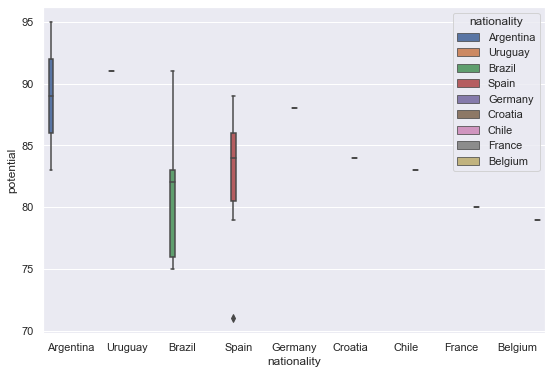

In [18]:
# FIFA 15

sns.boxplot(x= barcelona_15['nationality'], y= barcelona_15['potential'], data= barcelona_15, hue="nationality")
plt.gcf().set_size_inches(9,6)

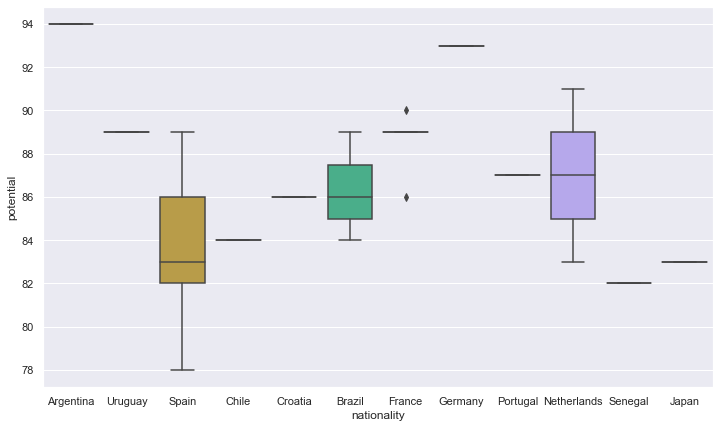

In [19]:
# FIFA 20

sns.boxplot(x= barcelona_20['nationality'], y= barcelona_20['potential'], data= barcelona_20)
plt.gcf().set_size_inches(12,7)


# FIFA 20
# BARCA PLAYERS meeting their potential OVERTIME

C:\Users\daiko\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\daiko\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


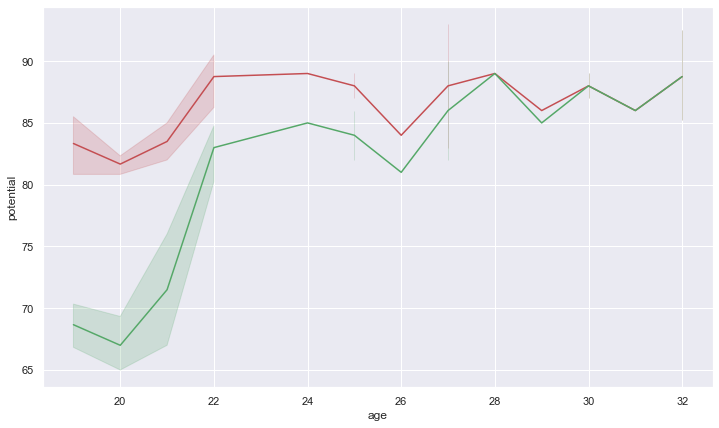

In [20]:
sns.lineplot(barcelona_20['age'], barcelona_20['potential'], color='r')
sns.lineplot(barcelona_20['age'], barcelona_20['overall'], color='g')
plt.gcf().set_size_inches(12,7)

# FINDING THE CO-relation between the FEATURES OF BARCA PLAYERS

In [21]:
barcelona_20.corr()

,age,overall,potential
age,1.000000,0.847712,0.544976
overall,0.847712,1.000000,0.850421
potential,0.544976,0.850421,1.000000


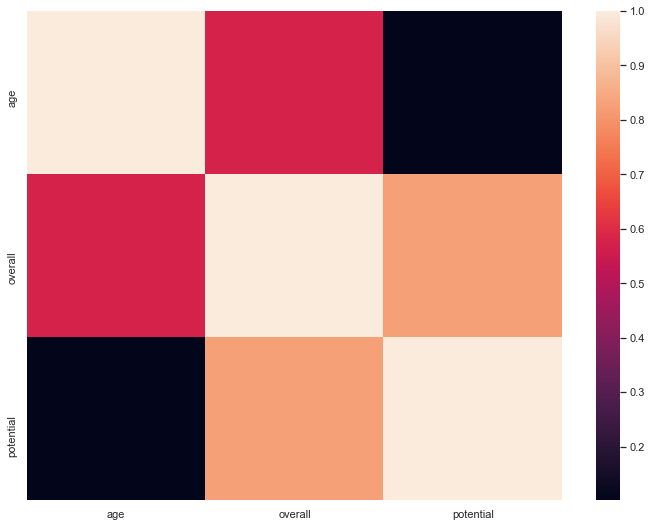

In [22]:
sns.heatmap(barcelona_15.corr())
plt.gcf().set_size_inches(12,9)

##################################

#################################

# CHEKCING if the SAME players of BARC from FIFA 18 are still on FIFA 20

In [23]:
df_fifa_18= pd.read_csv('players_18.csv')
df_fifa_18.head(4)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,32,1985-02-05,185,80,Portugal,Real Madrid,...,66+3,62+3,62+3,62+3,66+3,62+3,53+3,53+3,53+3,62+3
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,30,1987-06-24,170,72,Argentina,FC Barcelona,...,62+3,59+3,59+3,59+3,62+3,58+3,46+3,46+3,46+3,58+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Junior,25,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,64+3,59+3,59+3,59+3,64+3,60+3,47+3,47+3,47+3,60+3
3,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,31,1986-03-27,193,92,Germany,FC Bayern München,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
fifa_total_features= np.array(df_fifa_18.columns)

In [25]:
fifa_total_features

array(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club', 'overall',
       'potential', 'value_eur', 'wage_eur', 'player_positions',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'team_position',
       'team_jersey_number', 'loaned_from', 'joined',
       'contract_valid_until', 'nation_position', 'nation_jersey_number',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes',
       'gk_speed', 'gk_positioning', 'player_traits',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'mo

In [26]:
barcelona_18= df_fifa_18[['short_name','nationality','age','overall','potential','player_positions']][df_fifa_18['club'].values == 'FC Barcelona'].sort_values(by=['age'], ascending= False)

In [27]:
df_fifa_18['wage_eur'].sort_values

<bound method Series.sort_values of 0        565000
1        565000
2        280000
3        230000
4        510000
          ...  
17587      1000
17588      1000
17589      1000
17590      1000
17591      1000
Name: wage_eur, Length: 17592, dtype: int64>

# REMAINING PLAYERS FROM fifa 18 to fifa 20

In [28]:
barcelona_remained_players_from_18= barcelona_20.loc[ barcelona_20['short_name'].isin(barcelona_18['short_name'])]
barcelona_remained_players_from_18

,short_name,nationality,age,overall,potential,player_positions
0,L. Messi,Argentina,32,94,94,"RW, CF, ST"
19,L. Suárez,Uruguay,32,89,89,ST
29,Piqué,Spain,32,88,88,CB
64,I. Rakitić,Croatia,31,86,86,"CM, CDM"
21,Sergio Busquets,Spain,30,89,89,"CDM, CM"
51,Jordi Alba,Spain,30,87,87,LB
6,M. ter Stegen,Germany,27,90,93,GK
274,Sergi Roberto,Spain,27,82,83,"RB, RM, CM"
344,Rafinha,Brazil,26,81,84,"CAM, CM, RW"
249,Nélson Semedo,Portugal,25,82,87,RB


# FINDING THE CO_RELATION BETWEEN THE players Features 

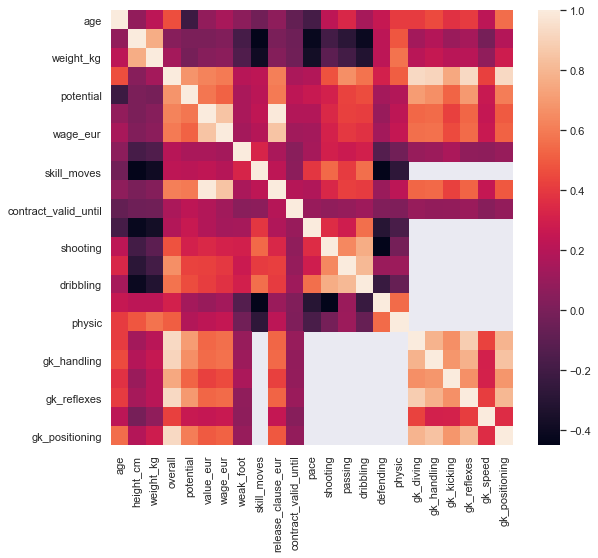

In [29]:
fifa_imp_feat= df_fifa_18.drop(columns=['sofifa_id','team_jersey_number','nation_jersey_number', 'international_reputation'])
sns.heatmap(fifa_imp_feat.corr())
plt.gcf().set_size_inches(9,8)

## CORR matrix

In [37]:
corr_matrix= df_fifa_20.drop(columns=['gk_diving', 'gk_reflexes','gk_positioning','gk_kicking','gk_handling']).corr()

# To check how much EACH attribute correlates with 'OVERALL' rating of the player

In [38]:
corr_matrix['overall'].sort_values(ascending= False)

overall                       1.000000
movement_reactions            0.864526
mentality_composure           0.719992
passing                       0.683954
potential                     0.646650
value_eur                     0.638230
release_clause_eur            0.631286
dribbling                     0.601190
wage_eur                      0.573578
power_shot_power              0.567504
physic                        0.517214
mentality_vision              0.509251
attacking_short_passing       0.503157
shooting                      0.497881
skill_long_passing            0.487289
gk_speed                      0.480652
international_reputation      0.475557
age                           0.464305
skill_ball_control            0.457052
power_long_shots              0.425081
skill_curve                   0.415521
skill_moves                   0.401261
mentality_aggression          0.399434
attacking_volleys             0.394152
skill_fk_accuracy             0.389790
attacking_crossing       